In [32]:
from scipy.io import mmread
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg

In [34]:
# Function to create matrix B
def generate_vector_b(n):
    b = np.zeros(n)
    b[0] = 1
    return b

In [33]:
A = mmread('s3dkq4m2.mtx')

In [35]:
n= A.shape[0]
b= generate_vector_b(n)

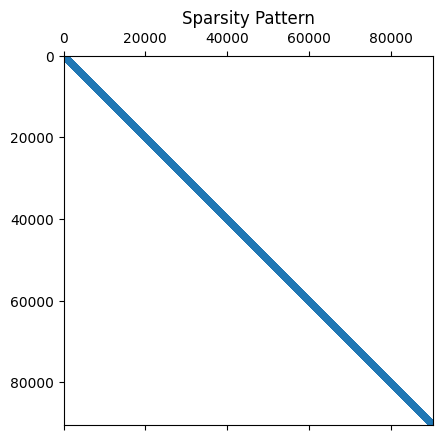

In [45]:
plt.spy(A, markersize=1)
plt.title("Sparsity Pattern")
plt.show()


In [36]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Convert A to a sparse matrix
A_sparse = csr_matrix(A)

# Estimate the condition number using sparse SVD
u, s, vt = svds(A_sparse, k=2)  # Compute the largest and smallest singular values
condition_number = s[-1] / s[0]  # s[-1]: smallest, s[0]: largest
print("Condition number (sparse):", condition_number)


Condition number (sparse): 1.0001742696157334


In [37]:
from pyamg import smoothed_aggregation_solver

# Create an AMG preconditioner
ml = smoothed_aggregation_solver(A_sparse)
M_inv = ml.aspreconditioner()


In [38]:
x, info = cg(A, b, M=M_inv)

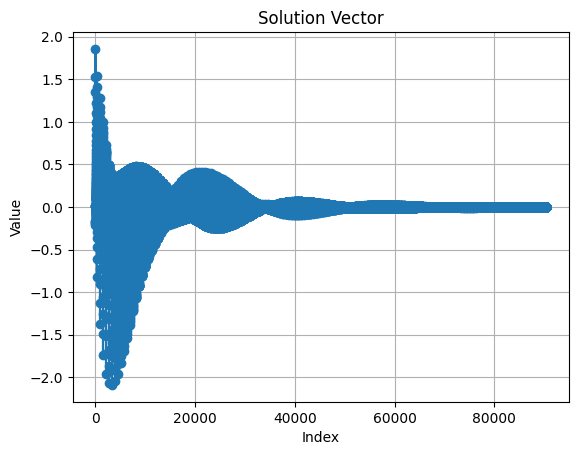

In [39]:
plt.plot(x, marker='o', linestyle='-')
plt.title("Solution Vector")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [40]:
B = mmread('gyro_k.mtx')

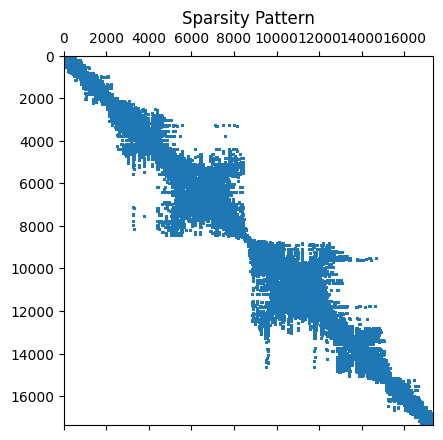

In [47]:
plt.spy(B, markersize=1)
plt.title("Sparsity Pattern")
plt.show()


In [49]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Convert A to a sparse matrix
B_sparse = csr_matrix(B)

# Estimate the condition number using sparse SVD
u, s, vt = svds(B_sparse, k=2)  # Compute the largest and smallest singular values
condition_number = s[-1] / s[0]  # s[-1]: smallest, s[0]: largest
print("Condition number (sparse):", condition_number)

Condition number (sparse): 1.202939011268885


In [41]:
n_b = B.shape[0]
b_b= generate_vector_b(n_b)

In [42]:
from scipy.sparse.linalg import LinearOperator

M_b = LinearOperator(B.shape, lambda x: x / B.diagonal())  # Jacobi preconditioner
x_b, info_b = cg(B, b_b, M=M_b)

In [43]:
residual_b = b_b - B @ x_b
error_norm_b = np.linalg.norm(residual_b)
print("Residual norm:", error_norm_b)


Residual norm: 9.974626460543845e-06


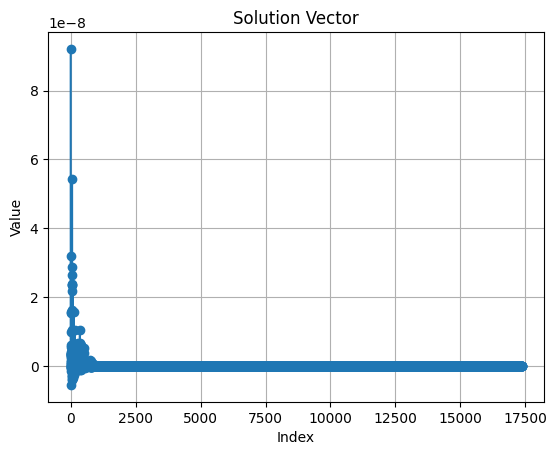

In [44]:
plt.plot(x_b, marker='o', linestyle='-')
plt.title("Solution Vector")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()